The required R packages are loaded into R for data cleaning and analysis.

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [3]:
set.seed(1)
messy_data<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv", skip=1)

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_character(),
  Temperature = col_character(),
  RH = col_character(),
  Ws = col_character(),
  Rain = col_character(),
  FFMC = col_character(),
  DMC = col_character(),
  DC = col_character(),
  ISI = col_character(),
  BUI = col_character(),
  FWI = col_character(),
  Classes = col_character()
)

Warning message:
“2 parsing failures.
row col   expected     actual                                                                                                       file
123  -- 14 columns 1 columns  'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
168  -- 14 columns 13 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
”


In [4]:
    
messy_data<-messy_data[-c(124),]
messy_data

#eliminate NA
still_messy_data<- na.omit(messy_data)

day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [6]:
data<-still_messy_data%>%
    mutate(Classes=as.factor(Classes))

data$Rain <- as.numeric(as.character(data$Rain))
data$Temperature<-as.numeric(as.character(data$Temperature))
data

day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [96]:
data_split<-initial_split(data,prop=0.50, strata=Classes)
data_train<-training(data_split)
data_test_messy<-testing(data_split)

data_train
data_test<-data_test_messy%>%
    select(-Classes)
data_test
	

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_character(),
  Temperature = col_character(),
  RH = col_character(),
  Ws = col_character(),
  Rain = col_character(),
  FFMC = col_character(),
  DMC = col_character(),
  DC = col_character(),
  ISI = col_character(),
  BUI = col_character(),
  FWI = col_character(),
  Classes = col_character()
)

Warning message:
“2 parsing failures.
row col   expected     actual                                                                                                       file
123  -- 14 columns 1 columns  'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
168  -- 14 columns 13 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
”


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
07,06,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
15,06,2012,28,80,17,3.1,49.4,3,7.4,0.4,3,0.1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
21,09,2012,35,34,17,0,92.2,23.6,97.3,13.8,29.4,21.6
23,09,2012,35,56,14,0,89,29.4,115.6,7.5,36,15.2
25,09,2012,28,70,15,0,79.9,13.8,36.1,2.4,14.1,3


In [70]:
set.seed(1)
#data_summarize<-data_test%>%
 #   group_by(Classes)%>%
 #   summarize(n=n())
#data_summarize
#from our analysis, we can see that the "fire" and "no fire" classes have 19 and 10 counts respectively in our training data. However, there is one row with missing data/variables present in the testing data

Temperature,Rain,Classes
<chr>,<dbl>,<fct>
29,1.3,not fire
26,13.1,not fire
25,2.5,not fire
⋮,⋮,⋮
27,0.5,not fire
24,0.1,not fire
24,0.2,not fire


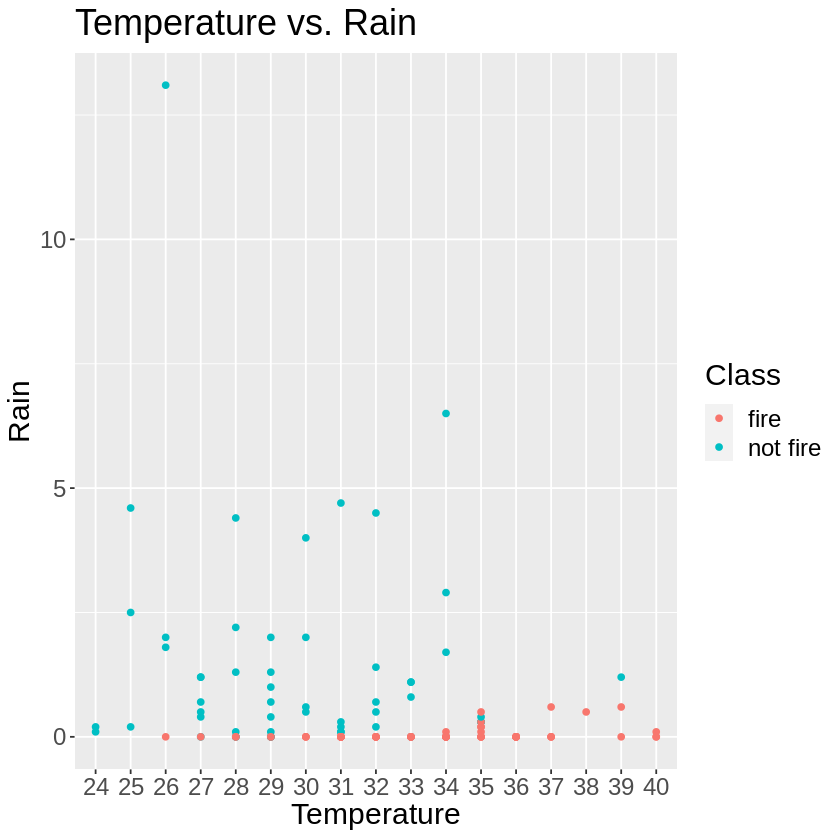

In [76]:
set.seed(1)
data_variables<-data_train%>%
    select(Temperature, Rain, Classes)
data_variables


data_plot_initial<-data_variables%>%
    ggplot(aes(x=Temperature, y=Rain, group=Classes))+
    geom_point(aes(color= Classes))+
    labs(x="Temperature", y="Rain", color="Class", title= "Temperature vs. Rain")+
    theme(text=element_text(size=18))
          
data_plot_initial


In [89]:
set.seed(1)

#Cross validation:

data_vfold<-vfold_cv(data_train, v=10,  strata= Classes) 

#Recipe:
data_recipe<- recipe( Classes~ Temperature+ Rain, data= data_train)%>%
step_scale(all_predictors())%>%
step_center(all_predictors()) 



data_spec<-nearest_neighbor(weight_func="rectangular", neighbors=tune())%>%
    set_engine("kknn")%>%
    set_mode("classification")

data_workflow<-workflow()%>%
    add_recipe(data_recipe)%>%
    add_model(data_spec)%>%
    tune_grid(resamples=data_vfold,grid=10)%>%
    collect_metrics()


data_workflow

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.8502914,10,0.02523510,Model1
2,roc_auc,binary,0.8928571,10,0.02242818,Model1
3,accuracy,binary,0.8614219,10,0.02053580,Model2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
12,roc_auc,binary,0.8880952,10,0.03160285,Model8
14,accuracy,binary,0.8195221,10,0.03052140,Model9
14,roc_auc,binary,0.8954762,10,0.03115006,Model9


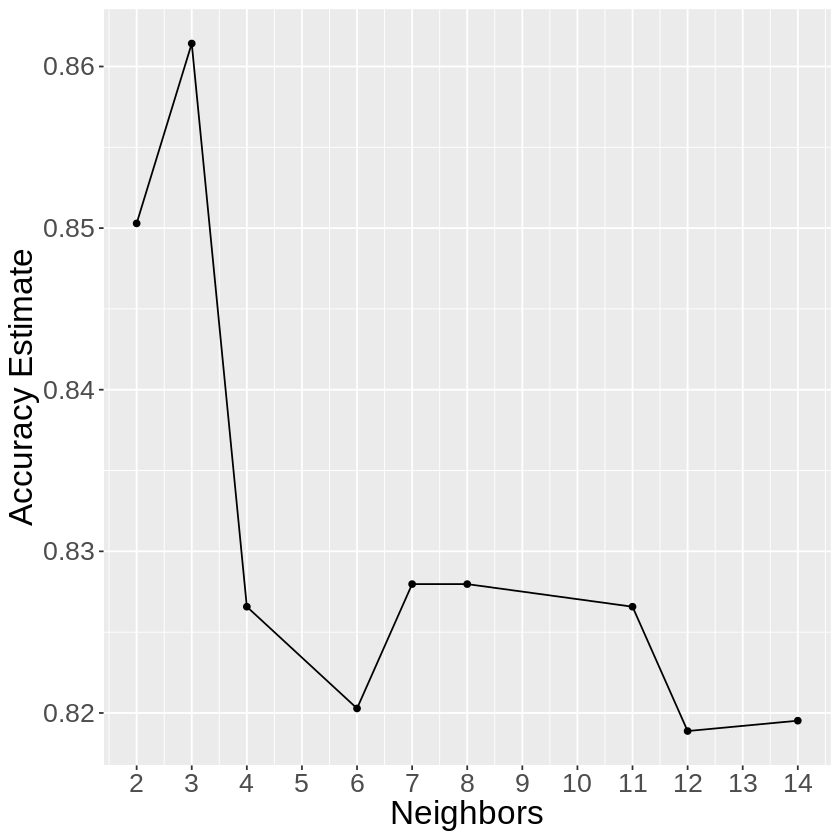

In [90]:
set.seed(1)
#accuracy and ggplot
accuracies<-data_workflow%>%
    filter(.metric=="accuracy")


accuracy_versus_k<-ggplot(accuracies, aes(x=neighbors, y=mean))+
    geom_point()+
    geom_line()+
    labs(x="Neighbors", y="Accuracy Estimate")+
    theme(text=element_text(size=20))+
    scale_x_continuous(breaks = seq(0, 14, by = 1)) 

accuracy_versus_k




In [95]:
testdata_spec<-nearest_neighbor(weight_func="rectangular",neighbors=7)%>%
    set_engine("kknn")%>%
    set_mode("classification")

testdata_recipe<- recipe( Classes~ Temperature+Rain, data= data_train)%>%
step_scale(all_predictors())%>%
step_center(all_predictors()) 

testworkflow<-workflow()%>%
    add_recipe(testdata_recipe)%>%
    add_model(testdata_spec)%>%
    fit(data= data_train)

prediction_test_data<- testworkflow%>%
    predict(data_test)%>%
    bind_cols(data_test_messy)
prediction_test_data

prediction_test_data_metrics<-prediction_test_data%>%
    metrics(truth= Classes, estimate =.pred_class)
    
prediction_test_data_metrics

prediction_test_data_classes<-prediction_test_data%>%
    select(.pred_class, Classes)


.pred_class,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<fct>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
fire,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
fire,07,06,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
not fire,15,06,2012,28,80,17,3.1,49.4,3,7.4,0.4,3,0.1,not fire
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fire,21,09,2012,35,34,17,0,92.2,23.6,97.3,13.8,29.4,21.6,fire
fire,23,09,2012,35,56,14,0,89,29.4,115.6,7.5,36,15.2,fire
not fire,25,09,2012,28,70,15,0,79.9,13.8,36.1,2.4,14.1,3,not fire


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8181818
kap,binary,0.6179679
